# [Return to Workflow](#what-now)

# Phase 2 Project version 2.0 - DSC060721 Cohort <a name="top"></a>

Purpose: to adapt prior project notebook for new data

Goal: to use old notebook's code and structure as a baseline for further adjustments



# **☑ To-Do's ☑**

- [ ] Fix [guiding questions](#td-questions)
- [ ] Modularize functions - incl. H2 read/inspect notes
- [ ] Create 'df_report" function
- [ ] Add links to each section addressing the rubric
- [ ] 
- [ ] 

# Rubric

---
**Business Understanding:** [Business Understanding](#bizund)

- [ ] Notebook clearly explains the project's value for helping a specific stakeholder solve a real-world problem.


- [ ] Introduction explains the real-world problem the project aims to solve


- [ ] Introduction identifies stakeholders who could use the project and how they would use it


- [ ] Conclusion summarizes implications of the project for the real-world problem and stakeholders

---
**Data Understanding:**
- [ ] Notebook clearly describes the source and properties of the data to show how useful the data are for solving the problem of interest.


- [ ] Describe the data sources and explain why the data are suitable for the project


- [ ] Present the size of the dataset and descriptive statistics for all features used in the analysis


- [ ] Justify the inclusion of features based on their properties and relevance for the project


- [ ] Identify any limitations of the data that have implications for the project

---
**Data Preparation:** 
- [ ] Notebook shows how you prepare your data and explains why by including…


- [ ] Instructions or code needed to get and prepare the raw data for analysis


- [ ] Code comments and text to explain what your data preparation code does


- [ ] Valid justifications for why the steps you took are appropriate for the problem you are solving

---
**Modeling:**
- [ ] Notebook demonstrates an iterative approach to model building.


- [ ] Runs and interprets a simple, baseline model for comparison


- [ ] Introduces new models that improve on prior models and interprets their results


- [ ] Explicitly justifies model changes based on the results of prior models and the problem context


- [ ] Explicitly describes any improvements found from running new models

---
**Regression Results:**
- [ ] Notebook clearly presents two features with strong relationships to sale prices


- [ ] Explicitly identify the features and interpret their coefficients in plain language


- [ ] Explain the implications of results for the real-world problem the project aims to address


- [ ] Identify specific actions that stakeholders should take to leverage these results

---
**Visualization:**
- [ ] Notebook includes three relevant and polished visualizations of findings that…


- [ ] Help the project stakeholder understand the value or success of the project


- [ ] Have text and marks to aid reader interpretation, such as graph and axis titles, axis ticks and labels, or legend (varies by visualization type)


- [ ] Use color, size, and/or location to appropriately facilitate comparisons


- [ ] Are not cluttered, dense, or illegible

---
**Code Quality:**
- [ ] Code in notebook and related files meets professional standards (e.g. PEP 8)


- [ ] Code is easy to read, using comments, spacing, variable names, and function docstrings


- [ ] All code runs and no code or comments are included that are not needed for the project


- [ ] Code minimizes repetition, using loops, functions, and classes


- [ ] Code adapted from others is properly cited with author names and location of the cited material
---

# Table of Contents: <a name="toc"></a>

- [Section](#Section)
- [Section](#Section)
- [Section](#Section)
- [Section](#Section)
- [Pipeline](#pipeline)

# (Re)Selling Seattle: Determining Impacts of Features on House Sale Price <a name="top"></a>

<a name='bizund'></a>

**<p style="text-align: center;">If you are considering selling your house, one of the highest priorities is getting the best price for it.</p>**

You want to make sure that the hedges are trimmed; that the basement isn't leaking; and that new coat of paint is covering up all of the "art" covering the walls from your kids.

*But what else can do you?* Would that extra bathroom under the stairs be a worthwhile addition? What about that addition you always talked about building?

---
**<p style="text-align: center;">When you are exploring the option of selling, you may ask such questions as:</p>**

>* How do the different aspects of your house impact the price?
>
>
>* What would be a predicted sell price for your house as-is?
>
>
>* What can you do to improve the house's value?

---
You may have some ideas already (and if you don't, watch a few episodes of "This Old House" and you will have *plenty* of inspiration).

But how do you *really* know what features are best? How can you be sure that your intuition or expectations are based on fact and not assumptions? **Turn to the data for answers!**

---
**<p style="text-align: center;">Revisiting King County</p>**

My [prior exploration](https://github.com/BenJMcCarty/Phase_2_Project_Final) of the King County House Sales dataset yielded some recommendations, but I wanted to see if I can improve them. I am revisiting the data with new techniques and approaches to see how much I can improve the results.

---

**WHAT QUESTIONS ARE IMPORTANT FROM THE BUSINESS PERSPECTIVE? WHAT QUESTIONS DID I USE TO GUIDE MY EXPLORATION?** <a name="td-questions"></a>

My project used data from house sales in King County, WA. to determine some of the top features determining the sell price of a home.

* **First, I explored the data using the Pandas package to review the data itself.** I reviewed the different features included in my dataset and their respective values; the descriptive statistics for the numerical data; and the overall size and shape of the data (how many rows and columns).

* **Then, I used Seaborn to plot the data and a fitted linear regression model for each feature against the sell price.** These visualizations helped differentiate which features to treat as *categorical* variables (e.g. features that would be one of a select number of options) versus *continuous* variables (which would have less of a rigid range of values).

* **In order to give more depth to my data, I engineered four new features based on the original features and data.** I determined the age of each house at sale; whether or not a home was renovated; how many years since a renovation; and whether or not a house had a basement.

* **I wanted to make sure all of the features and their data were relevant to apply to my future model.** I performed correlational comparisons to determine which features were too closely related (indicating multicollinearity), which would affect my modeling process later on.

* **To test my assumptions that certain features would have a statistically significant impact on the price, I performed a few statistical tests.** I performed an ANOVA test on our "condition" feature (comparing each ranking of condition against the others) and I ran a two-sample t-test on the "waterfront" and "was_renovated" features as well.

* **LReg for Inferences**

# **Setting Up the Tools and Data**

## Imports

In [1]:
# Data Handling
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling - Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sms

# Modeling - SKLearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

# Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
set_config(display='diagram')

## Importing Personal Functions

I created several functions specific to this project and saved them in an external file. The file is available from the main directory.

In [86]:
%reload_ext autoreload
%autoreload 2

In [106]:
from p2pr_functions.functions import *

## Reading Data

In [89]:
# old_data = 'https://raw.githubusercontent.com/BenJMcCarty/Phase_2_Project_Final/main/kc_house_data_train.csv'

# new_data = 'https://raw.githubusercontent.com/BenJMcCarty/king_county_housing/main/data/kc_house_data.csv'

local_data = 'data/kc_house_data.csv'

In [90]:
df= pd.read_csv(local_data, index_col=0)

# **Exploring Fresh Data**

## Basic Overviews

The goal for this section is to get a broad idea of the data before I start any cleaning or feature engineering.

In [91]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [97]:
## Review summary of dataframe details

report_df(df)

,DTypes,num_unique,NaN_sum,NaN_pct,count,mean,std,min,25%,50%,75%,max
date,object,372,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,float64,3622,0,0.000000,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,int64,12,0,0.000000,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,float64,29,0,0.000000,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,int64,1034,0,0.000000,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,int64,9776,0,0.000000,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,float64,6,0,0.000000,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,float64,2,2376,0.110015,19221.0,0.007596,0.086825,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,float64,5,63,0.002917,21534.0,0.233863,0.765686,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,int64,5,0,0.000000,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00


## Data Cleaning and Processing

In [100]:
## Creating a pairplot instead of the individual plots below
# sns.pairplot(data=df,corner=True)
# plt.show()

**DF Columns to Convert**

* 'date' to datetime; continuous variable
* 'waterfront' to category; nominal/binary variable
* 'view' to category; ordinal
* 'condition' to category; ordinal variable
* 'grade' to category; ordinal variable
* 'zipcode' to category; nominal variable

**Null Values to Process**
* 'yr_renovated'
    - check against yr_built; if diff == 0, then fill with zero
    - If diff > 0, determine h2 fillna
* 'waterfront' - ColXF, KNN/ItImp
* 'view' - ColXF, KNN/ItImp

In [101]:
## Converting 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])
df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [108]:
df_na_col = []
for col in df:
    if df[col].isna().sum() > 0:
        df_na_col.append(col)

df_na_col

['waterfront', 'view', 'yr_renovated']

In [112]:
## Converting 'sqft_basement' to numeric and filling any null values with zero
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'].fillna('0', inplace=True)
print(f'There are {df["sqft_basement"].isna().sum()} null values.\n')

There are 0 null values.



In [113]:
for i in df_na_col:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [114]:
report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
date,datetime64[ns],372,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,float64,3622,0,0.0,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,int64,12,0,0.0,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,float64,29,0,0.0,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,int64,1034,0,0.0,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,int64,9776,0,0.0,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,float64,6,0,0.0,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,float64,2,0,0.0,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,float64,5,0,0.0,21597.0,0.233181,0.764673,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,int64,5,0,0.0,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00


### Overview Summary

The dataset contains 2 columns of data, most of which seem useful for evaluations and modeling.

After processing, I do not have any null values and all of the datatypes are correct (I can convert some columns into the "category" datatype for analysis later, if needed).

## Exploring Features

Now I will be comparing each individual feature against "price" to determine if a feature is continuous or categorical.

I will check the regressions and histograms for each feature; if a regression plot shows a flatter regression line or if the histogram is not a normal distribution, I will treat that feature as a categorical feature.

As part of the function to create the plots, I include my function to ignore any outliers for the purpose of the visualizations. I will *not* change the data itself, though.


| Feature Names<a name='features'></a> | Feature Names  |
| ------------ | ------------- |
| [Bedrooms](#bedrooms)     | [Sqft_above](#above)    |
| [Bathrooms](#bathrooms)    | [Sqft_basement](#base) |
| [Sqft_living](#living)  | [Yr_built](#built)      |
| [Sqft_lot](#lot)     | [Yr_renovated](#reno)  |
| [Floors](#floors)       | [Zipcode](#zip)       |
| [Waterfront](#wf)   | [Lat](#lat)           |
| [View](#view)         | [Long](#long)          |
| [Condition](#cond)    | [Sqft_living15](#living15)    |
| [Grade](#grade)        | [Sqft_lot15](#lot15)    |

**Bedrooms** <a name="bedrooms"></a> [🔝](#features)

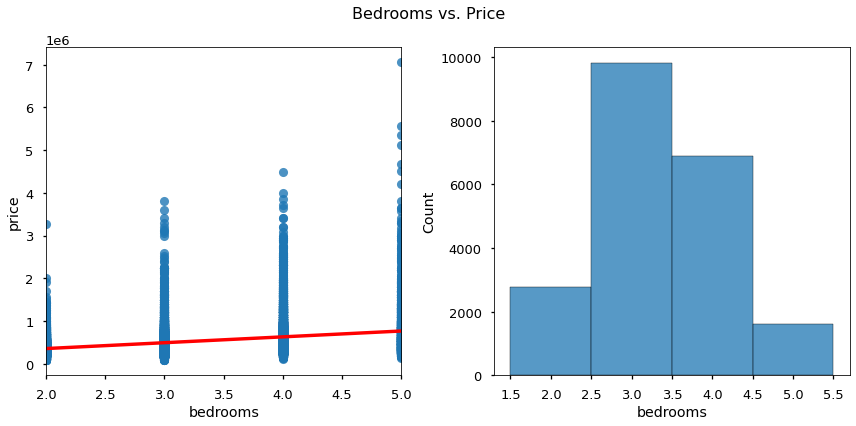

In [17]:
show_cleaned_vis(data=df,x='bedrooms', categorical=True, kde = False)

***
**Observations**
>* There is a slight linear regression between the number of bedrooms and the sell price, indicated by the positive slope of the regression line.
>
>
>* The histogram slightly resembles a normal distribution, although the first and last bins are lower than I would expect for a normal distribution.

***
**TO-DO**
>* Use `'bedrooms'` as a categorical variable.
***

**Bathrooms** <a name="bathrooms"></a> [🔝](#features)

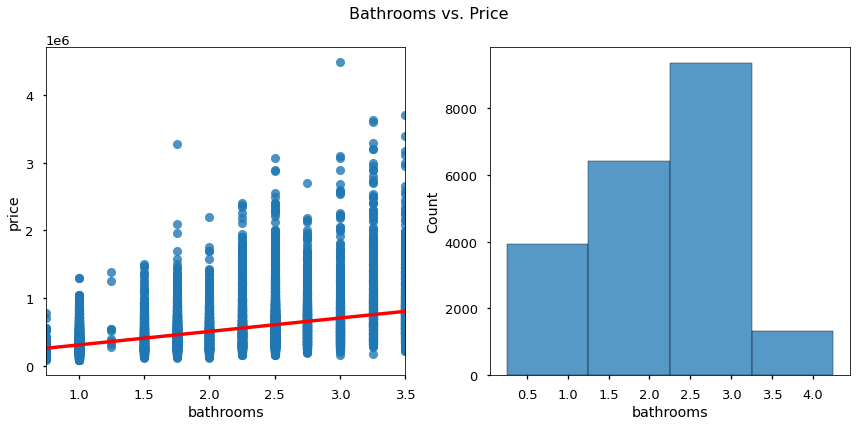

In [18]:
show_cleaned_vis(df,"bathrooms", categorical=True, kde=False)

***
**Observations**
>* There is a clear linear relationship between bathrooms and price.
>
>
>* The histogram/normal distribution isn't the strongest, particularly for the larger number of bathrooms.

***
**TO-DO**
>
>* Similar to bedrooms, the values for number of bathrooms are discrete and fall into specific values. This indicates that the feature is categorical.
*** 

**Sqft_living** <a name="living"></a> [🔝](#features)

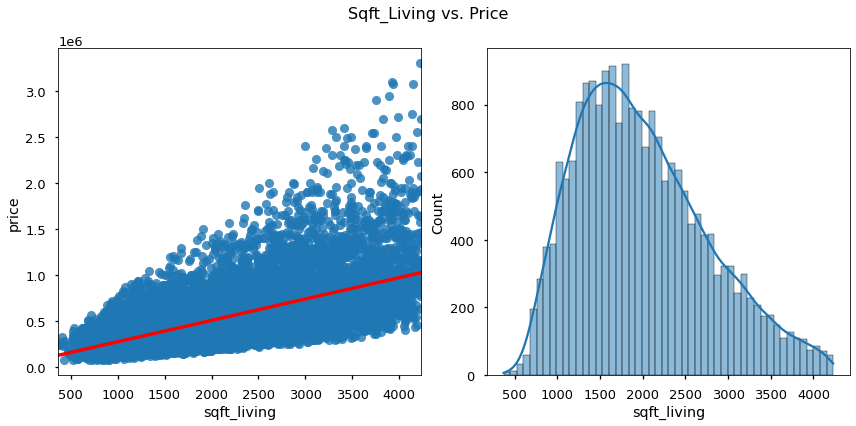

In [19]:
show_cleaned_vis(df,"sqft_living")

***
**Observations**

>* There is a clear linear relationship, although the distribution is slightly skewed to the right, indicating it's not a perfect normal distribution.
>
>
>* As the values are spread across the whole range, this feature is clearly a continuous variable.

***

**To-Do**

>* Use as continuous variable
***


**Sqft_lot** <a name="lot"></a>

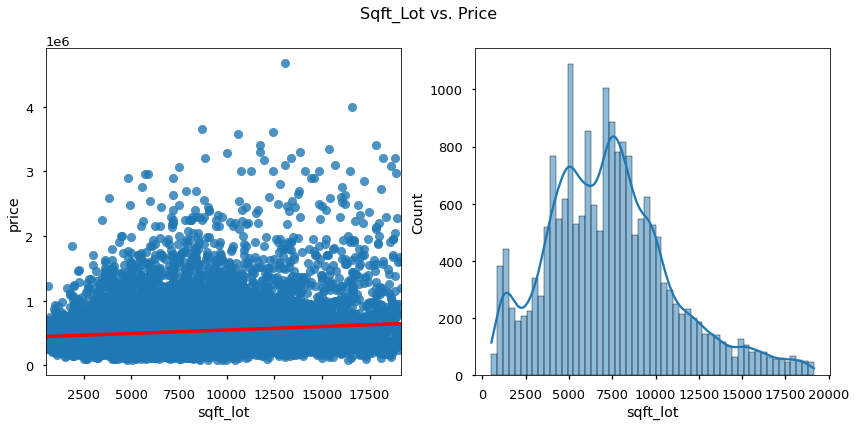

In [20]:
show_cleaned_vis(df,"sqft_lot")

***
**Observations**

>* Weak linear relationship with price; distribution skewed right.
***

**To-Do**

>* Treat as continuous variable as the values are spread out across the whole range.

***

**Floors** <a name="floors"></a> [🔝](#features)

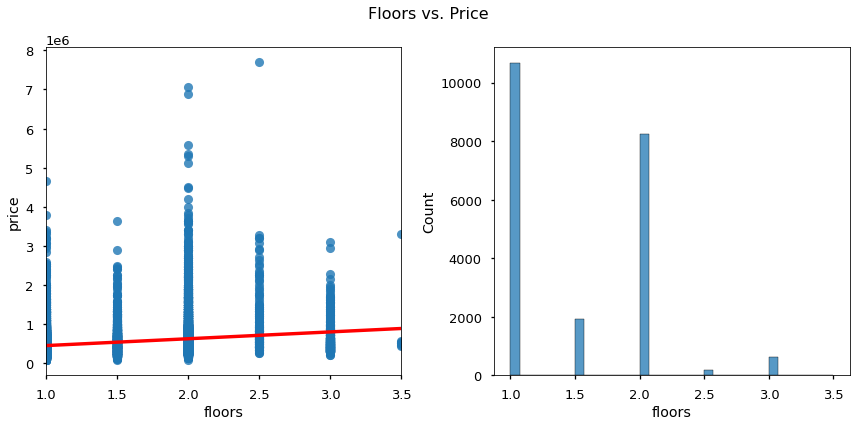

In [21]:
show_cleaned_vis(df,"floors", kde=False)

***
**Observations**

>* Linear relationship, but clearly categorical as the values fall into specific categories ranging from 1-3.5
>
>* Most homes had one or two floors.

***
**To-Do**

>* Treat as categorical variable.
 
***

**Waterfront** <a name="wf"></a> [🔝](#features)

0.0    21451
1.0      146
Name: waterfront, dtype: int64


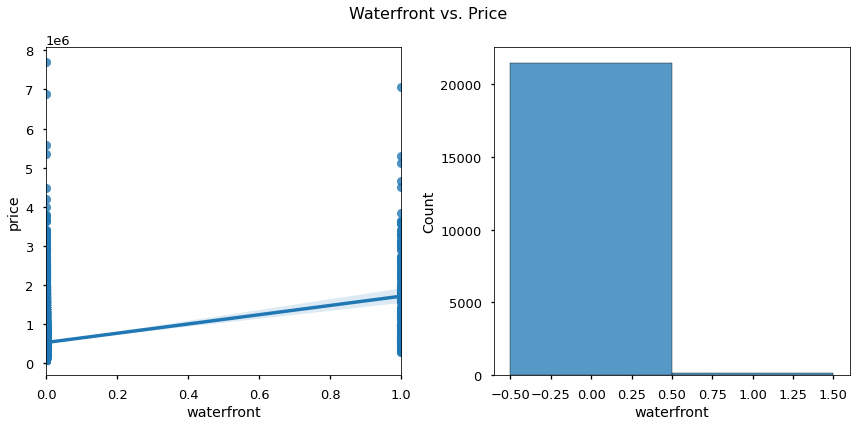

In [22]:
feature_vis(df,"waterfront", categorical=True, kde=False)

***
**Observations**

>* Graphs are misleading - clearly binary variable with a slight linear relationship.
>
>
>* Most properties are non-waterfront.
>
>
>* Clear linear relationship, but not normally distributed

***
**To-Do**

>* Treat as categorical - only two options (0 or 1).
 
***

**View** <a name="view"></a> [🔝](#features)

0.0    19485
1.0      330
2.0      957
3.0      508
4.0      317
Name: view, dtype: int64


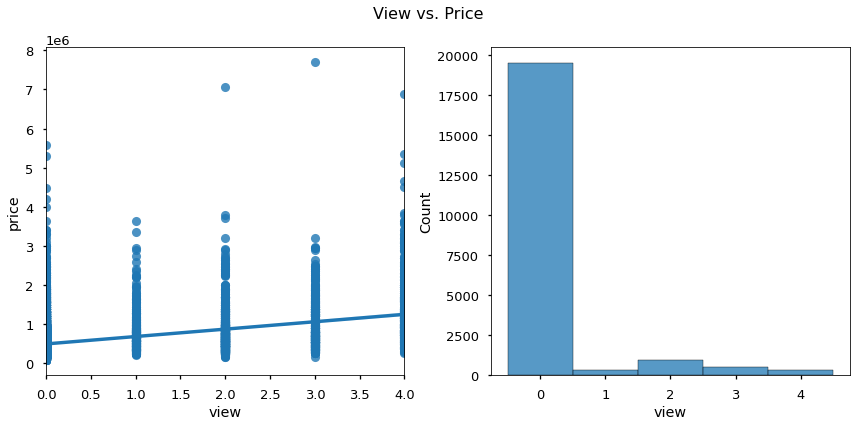

In [23]:
feature_vis(df,"view", categorical=True, kde=False)

***
**Observations**

>* Slight linear relationship - higher "view" rating, higher price
>
>
>* Most homes have '0' view
>
>
>* A few extreme outliers in pricing (for values 2, 3, and 4s)

***
**To-Do**

>* Treat as categorical
 
***

**Condition** <a name="cond"></a> [🔝](#features)

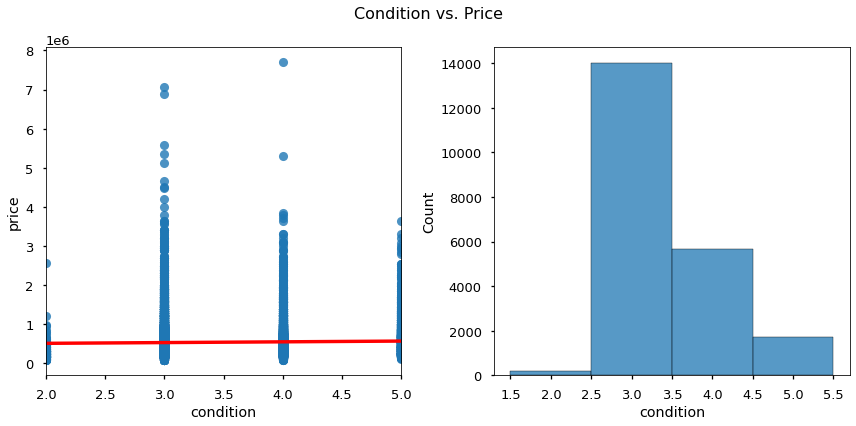

In [24]:
show_cleaned_vis(df,"condition", categorical=True, kde= False)

***
**Observations**

>* Largest number of homes sold were in condition 3, followed by condition 4.
>
>
>* Very few homes sold with conditions of 1s or 2s.
>
>
>* Price outliers in 4.0 area, some slight outliers in 2 and 3
>
>
>* No linear relationship, not normal distribution.

***
**TO-DO**

>* Treat as categorical
 
***

**Grade** <a name="grade"></a> [🔝](#features)

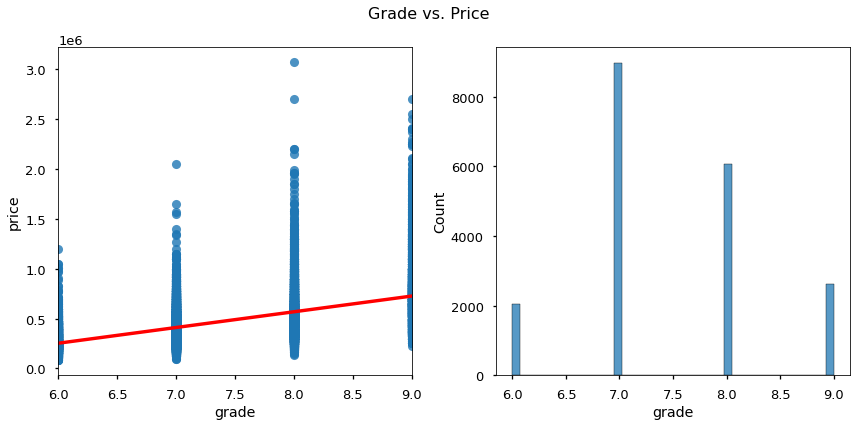

In [25]:
show_cleaned_vis(df,"grade", kde=False)

**Observations**

>* Clear linear trend - as grade increases, so does price
>
>
>* Grades range from 6-9
>
>
>* Price outliers for grades 7 and 8

---
**To-Do**

>* Treat as categorical variable


**Sqft_above** <a name="above"></a> [🔝](#features)

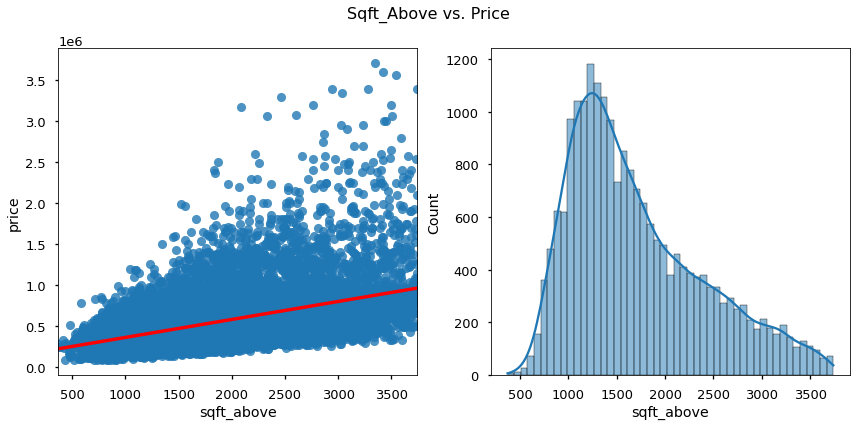

In [26]:
show_cleaned_vis(df,"sqft_above")

---

**Observations**

>* Outliers impacting accuracy of linear regression, but still seems relatively linear.
>
>
>* Distribution skewed right, but otherwise normal
---
**TO-DO**

>* Treat as continuous
---

**Sqft_basement** <a name="base"></a>[🔝](#features)

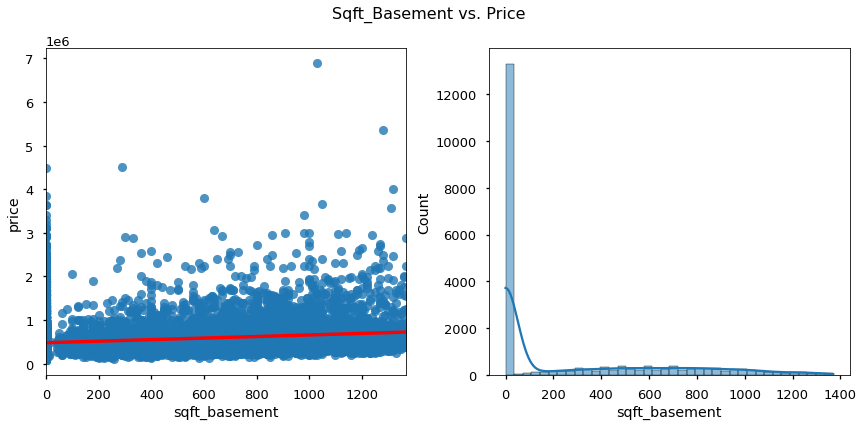

In [27]:
show_cleaned_vis(df,"sqft_basement") 

---
**Observations**

>* There is a very large number of 0 ft$^2$ basements, indicating that these homes do not have a basement
>
>
>* There are scattered outliers in pricing
>
>
>* The regression is poor due to the large number of 0 values

---
**To-Do**

>* Treat as a continuous variable
>
>
>* Can create new categorical, binary variable to indicate whether or not a house has a basement to measure the impact on price.
---

**Yr_built** <a name="built"></a> [🔝](#features)

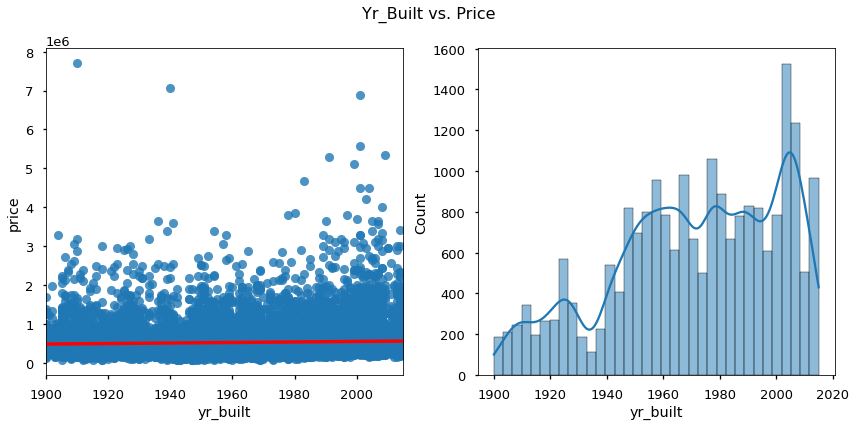

In [28]:
show_cleaned_vis(df,"yr_built")

---
**Observations**

>* No linear trend from this regression plot
>
>* Seems like may houses built between 1940 - 1970, then major boom in early 2000s.
>
>* Some significant outliers in price, but not enough to  impact the regression
---

**To-Do**

>* Compare year built to year sold - how old was the house at sale?
>
>
>* Potentially discretize for analysis.
---

**Yr_renovated** <a name="reno"></a> [🔝](#features)

0.0       20853
1934.0        1
1940.0        2
1944.0        1
1945.0        3
          ...  
2011.0        9
2012.0        8
2013.0       31
2014.0       73
2015.0       14
Name: yr_renovated, Length: 70, dtype: int64


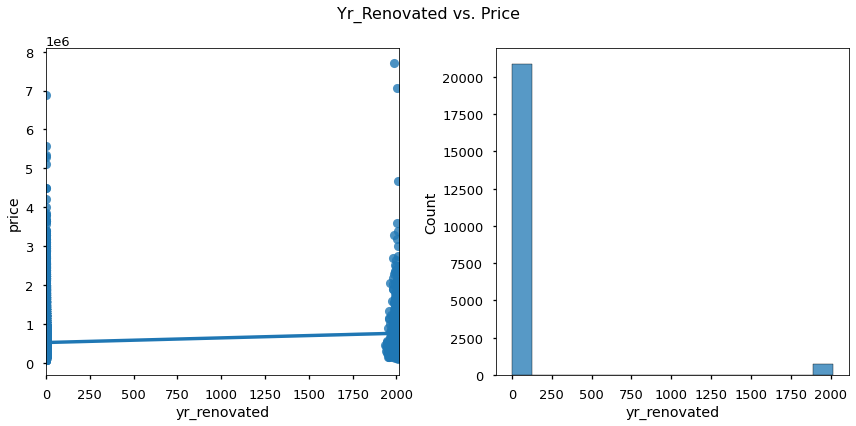

In [29]:
feature_vis(df,'yr_renovated', kde=False)


**Observations**

>* Number of houses not renovated significantly outweighs the number renovated
>
>* Graphs indicate that an engineered feature for whether or not the house was renovated would be worthwhile.
---
**TO-DO**

>* Create new categorical feature - renovated or not

**Zipcode** <a name="zip"></a> [🔝](#features)

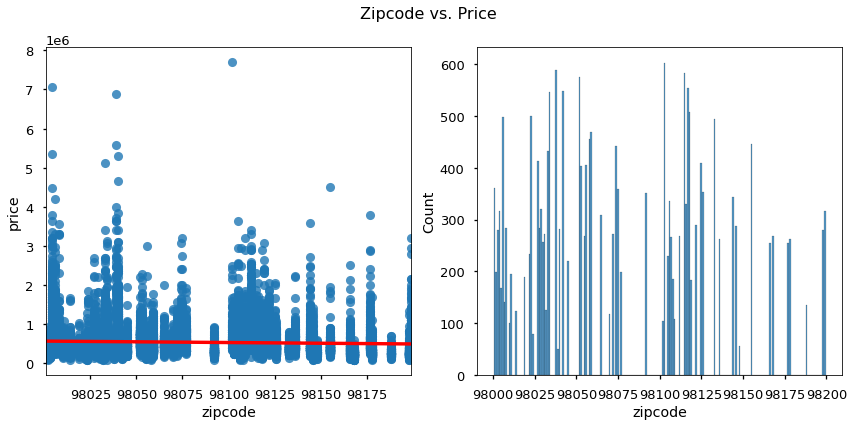

In [30]:
show_cleaned_vis(df,"zipcode", categorical=True, kde=False)

---
**Observations**

>* No linear relationship; not normally distributed
---
**TO-DO**

>* Treat as categorical variable
>
>* Perform OneHotEncoding to create new features for modeling.
---

**Lat** <a name="lat"></a> [🔝](#features)

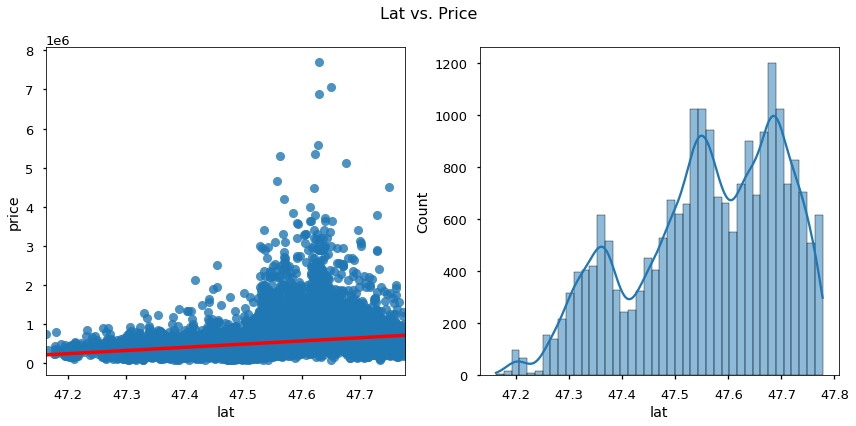

In [31]:
show_cleaned_vis(df,"lat")

**Observations**

>* Very weak linear relationship and not normally distributed.
>
>* Outliers just slightly past 47.6 degrees latitude

---
**TO-DO**

>* Treat as continuous if used for modeling.

**Long** <a name="long"></a> [🔝](#features)

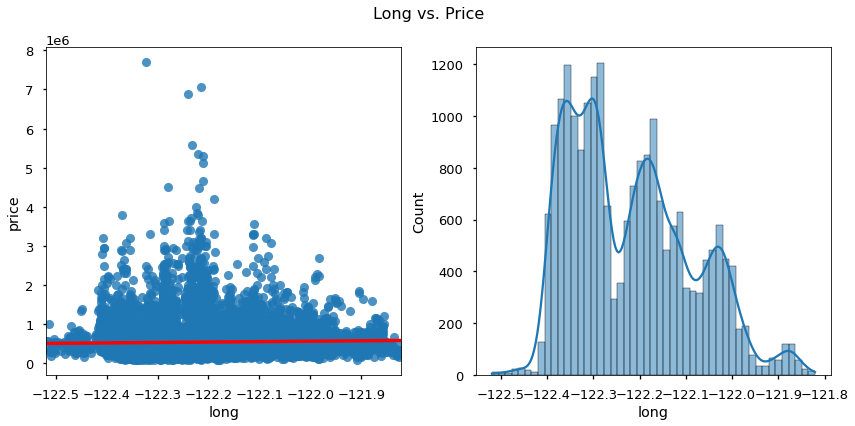

In [32]:
show_cleaned_vis(df,"long")

**Observations**

>* No linear relationship and not normally distributed.
>
>* Outliers around -122.32ish and -122.25-ish degrees

---
**TO-DO**

>* Treat as continuous if used for modeling.

**Sqft_living15** <a name="living15"></a> [🔝](#features)

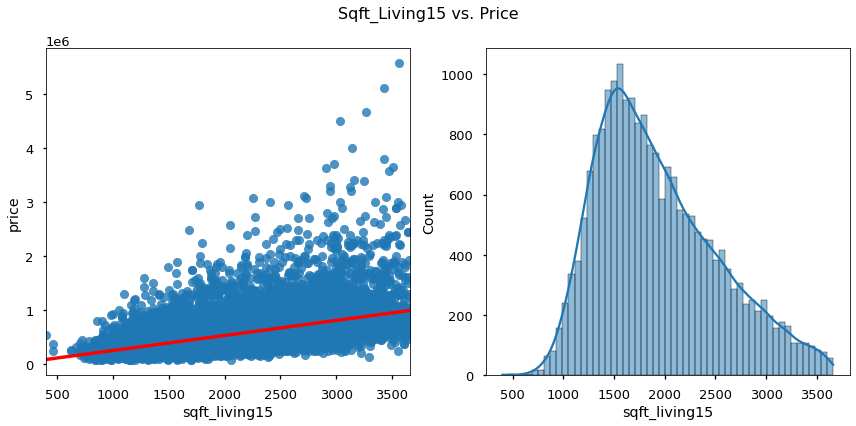

In [33]:
show_cleaned_vis(df,"sqft_living15")

---
**Observations**

>* Most properties sold with sqft between 1500/2000 
>
>* Price follows linear trend and is normally distributed, although skewed right.
>
>* Outliers between 2500-3500 ft$^2$ 
---
**TO-DO**

>* Treat as continuous variable
---

**Sqft_lot15** <a name="lot15"></a> [🔝](#features)

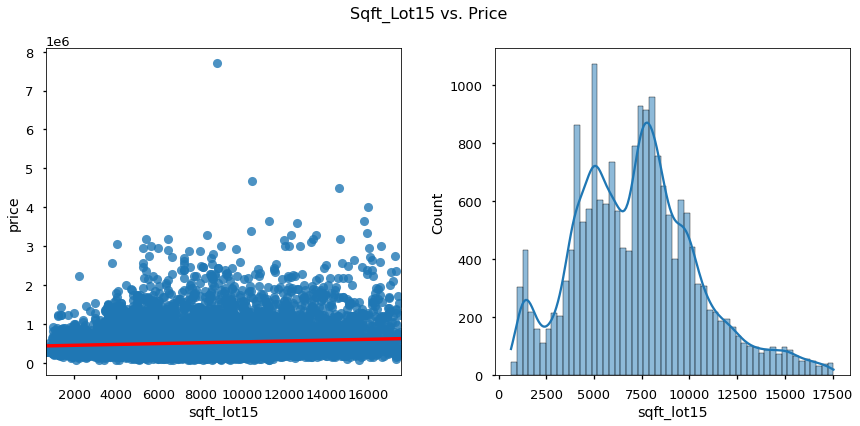

In [34]:
show_cleaned_vis(df,"sqft_lot15")

---
**Observations**

>* No clear linear trend
>* Significant outlier at approx. 9000 ft$^2$

---
**TO-DO**
>* Treat as continuous variable
---

# **Feature Engineering**

## Creating `'yrs_old_sold'`

I created this feature to differentiate between houses that were built recently versus older houses.

In order to determine this feature, I need to determine the year the house was sold first.

### Determine `'year_sold'`

In [59]:
## Pull the year from the "date" column
df['year_sold'] = pd.DatetimeIndex(df['date']).year

## Review the values to ensure data integrity
df['year_sold'].value_counts()

2014    14622
2015     6975
Name: year_sold, dtype: int64

### Calculate `'y_old_sold'`

In [60]:
## Calculating the age of the house at the time of sale
df['y_old_sold'] = df['year_sold'] - df['yr_built']

## Minimum age is -1 due to a house being sold before it was finished being built
display(df['y_old_sold'].value_counts().sort_index(), df['y_old_sold'].describe())

-1       12
 0      430
 1      285
 2      174
 3      165
       ... 
 111     50
 112     33
 113     28
 114     69
 115     26
Name: y_old_sold, Length: 117, dtype: int64

count    21597.000000
mean        43.323286
std         29.377285
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: y_old_sold, dtype: float64

**Results:** Half of the homes sold fall between the ages of 18 and 63 years old, with the average age of 43 years. Our min and max ages indicate a house was sold before it was built, while another house was 115 years old.

## `'was_renovated'`

I created this feature to determine whether or not a house was renovated. If a house was renovated, what impact would that have on the price? 

In [61]:
## Using the year that the home was renovated to deterine whether or not the home was renovated
reno_y_n = np.where(df['yr_renovated']>0, 1, 0 )
df = df.assign(was_renovated = reno_y_n)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,0
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0


In [62]:
## Checking values
df['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

**Results:** Most of the houses were not renovated at the time of sale. This feature may not have a significant impact on determining the sale price due to the small number of renovated houses.

## `"yrs_since_reno"`

If a house was renovated, how long ago was the renovation? Would more newly-renovated houses increase price?

In [63]:
## Ensuring there are no null values in the new feature and replacing any with zeroes

df['yrs_since_reno'] = np.where((df['was_renovated']==1),
                                (df['year_sold'] - df['yr_renovated']), 0)

display(df['yrs_since_reno'].describe(),df['yrs_since_reno'].value_counts(ascending=False))

count    21597.000000
mean         0.631986
std          4.424853
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         80.000000
Name: yrs_since_reno, dtype: float64

0.0     20921
1.0        37
8.0        34
10.0       29
11.0       27
        ...  
65.0        1
60.0        1
53.0        1
61.0        1
57.0        1
Name: yrs_since_reno, Length: 70, dtype: int64

In [64]:
## Checking for which properties show a renovation year post-sale

df[df['year_sold'] < df['yr_renovated']]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno
id,,,,,,,,,,,,,,,,,,,,,,,,
8712100320,7/28/2014,585000.0,5,2.75,2350,4178,1.5,0.0,0.0,3,8,1520,830.0,1922,2015.0,98112,47.6388,-122.300,1920,4178,2014,92,1,-1.0
9141100005,10/28/2014,285000.0,4,3.50,2770,10505,2.0,0.0,0.0,3,8,2770,0.0,1940,2015.0,98133,47.7412,-122.355,1760,10505,2014,74,1,-1.0
7284900030,5/22/2014,850000.0,4,3.25,3090,6744,2.0,0.0,4.0,3,9,3090,0.0,1923,2015.0,98177,47.7680,-122.388,2020,6656,2014,91,1,-1.0
3585900665,6/6/2014,805000.0,5,2.50,4600,19831,1.0,0.0,3.0,3,9,2300,2300.0,1956,2015.0,98177,47.7608,-122.378,2890,19831,2014,58,1,-1.0
3585900190,10/6/2014,825000.0,3,2.50,3400,38400,1.0,0.0,4.0,3,8,1870,1530.0,1955,2015.0,98177,47.7611,-122.372,3400,24338,2014,59,1,-1.0
8935100100,7/1/2014,476000.0,4,3.00,2890,6885,1.0,0.0,0.0,3,7,1590,1300.0,1945,2015.0,98115,47.6763,-122.282,2180,6885,2014,69,1,-1.0


In [65]:
## Reviewing stats for those houses that were renovated

yrs_and_reno = df[df['yrs_since_reno'] > 0]
yrs_and_reno['yrs_since_reno'].describe()

count    670.000000
mean      20.380597
std       15.130620
min        1.000000
25%        9.000000
50%       17.000000
75%       28.000000
max       80.000000
Name: yrs_since_reno, dtype: float64

**Results:** As expected, most of the houses were not renovated (indicated by the number of years being zero). 

Of those renovated, half of the homes had between 9 and 28 years between the years sold and renovated, with an average ages of roughly 20 years old.

Interestingly, this dataset also shows *six records for which the renovation is shown to be post-sale.* While this may be an error, I am leaving it in the dataset since I cannot confidently rule it out. 

If this feature does not show statistical significance, I may drops these values and reevaluate the significance.

## "`has_bsmnt`"

I noticed that there were fewer houses with a value for "sqft_basement" during my data exploration. I am curious if the presence or absence of a basement would have any impact.

In [66]:
## Determining whether or not a house has a basement based on the square footage
df['has_bsmnt'] = np.where(df['sqft_basement'] > 0, 1, 0)

# Reviewing the results
display(df['has_bsmnt'].describe(), df['has_bsmnt'].value_counts())

TypeError: '>' not supported between instances of 'str' and 'int'

# **Correlations**

## Determining Correlations with Price

In [43]:
## Determining top five features most strongly correlated with price
## (Considering absolute values for magnitude, not direction)

df_corr = np.abs(df.drop(['price', 'lat','long', 'yr_renovated'], axis=1).corrwith(df['price']).sort_values(ascending=False))
display(df_corr[0:5])

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
dtype: float64

## Determining Multicollinearity

In [44]:
## Get the correlation matrix for the data (without the target)
corr = np.abs(df.drop('price',axis=1).corr())
corr.round(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,y_old_sold,was_renovated,yrs_since_reno,has_bsmnt
bedrooms,1.00,0.51,0.58,0.03,0.18,0.00,0.08,0.03,0.36,0.48,0.30,0.16,0.02,0.15,0.01,0.13,0.39,0.03,0.01,0.16,0.02,0.01,0.16
bathrooms,0.51,1.00,0.76,0.09,0.50,0.06,0.19,0.13,0.67,0.69,0.28,0.51,0.05,0.20,0.02,0.22,0.57,0.09,0.03,0.51,0.05,0.00,0.16
sqft_living,0.58,0.76,1.00,0.17,0.35,0.10,0.28,0.06,0.76,0.88,0.43,0.32,0.05,0.20,0.05,0.24,0.76,0.18,0.03,0.32,0.05,0.02,0.20
sqft_lot,0.03,0.09,0.17,1.00,0.00,0.02,0.08,0.01,0.11,0.18,0.02,0.05,0.00,0.13,0.09,0.23,0.14,0.72,0.01,0.05,0.01,0.01,0.03
floors,0.18,0.50,0.35,0.00,1.00,0.02,0.03,0.26,0.46,0.52,0.24,0.49,0.00,0.06,0.05,0.13,0.28,0.01,0.02,0.49,0.00,0.00,0.25
waterfront,0.00,0.06,0.10,0.02,0.02,1.00,0.38,0.02,0.08,0.07,0.08,0.02,0.07,0.03,0.01,0.04,0.08,0.03,0.01,0.02,0.07,0.08,0.04
view,0.08,0.19,0.28,0.08,0.03,0.38,1.00,0.05,0.25,0.17,0.27,0.05,0.09,0.09,0.01,0.08,0.28,0.07,0.00,0.05,0.09,0.08,0.18
condition,0.03,0.13,0.06,0.01,0.26,0.02,0.05,1.00,0.15,0.16,0.17,0.36,0.06,0.00,0.02,0.11,0.09,0.00,0.05,0.36,0.06,0.01,0.13
grade,0.36,0.67,0.76,0.11,0.46,0.08,0.25,0.15,1.00,0.76,0.17,0.45,0.02,0.19,0.11,0.20,0.71,0.12,0.03,0.45,0.02,0.02,0.05
sqft_above,0.48,0.69,0.88,0.18,0.52,0.07,0.17,0.16,0.76,1.00,0.05,0.42,0.02,0.26,0.00,0.34,0.73,0.20,0.02,0.42,0.02,0.01,0.21


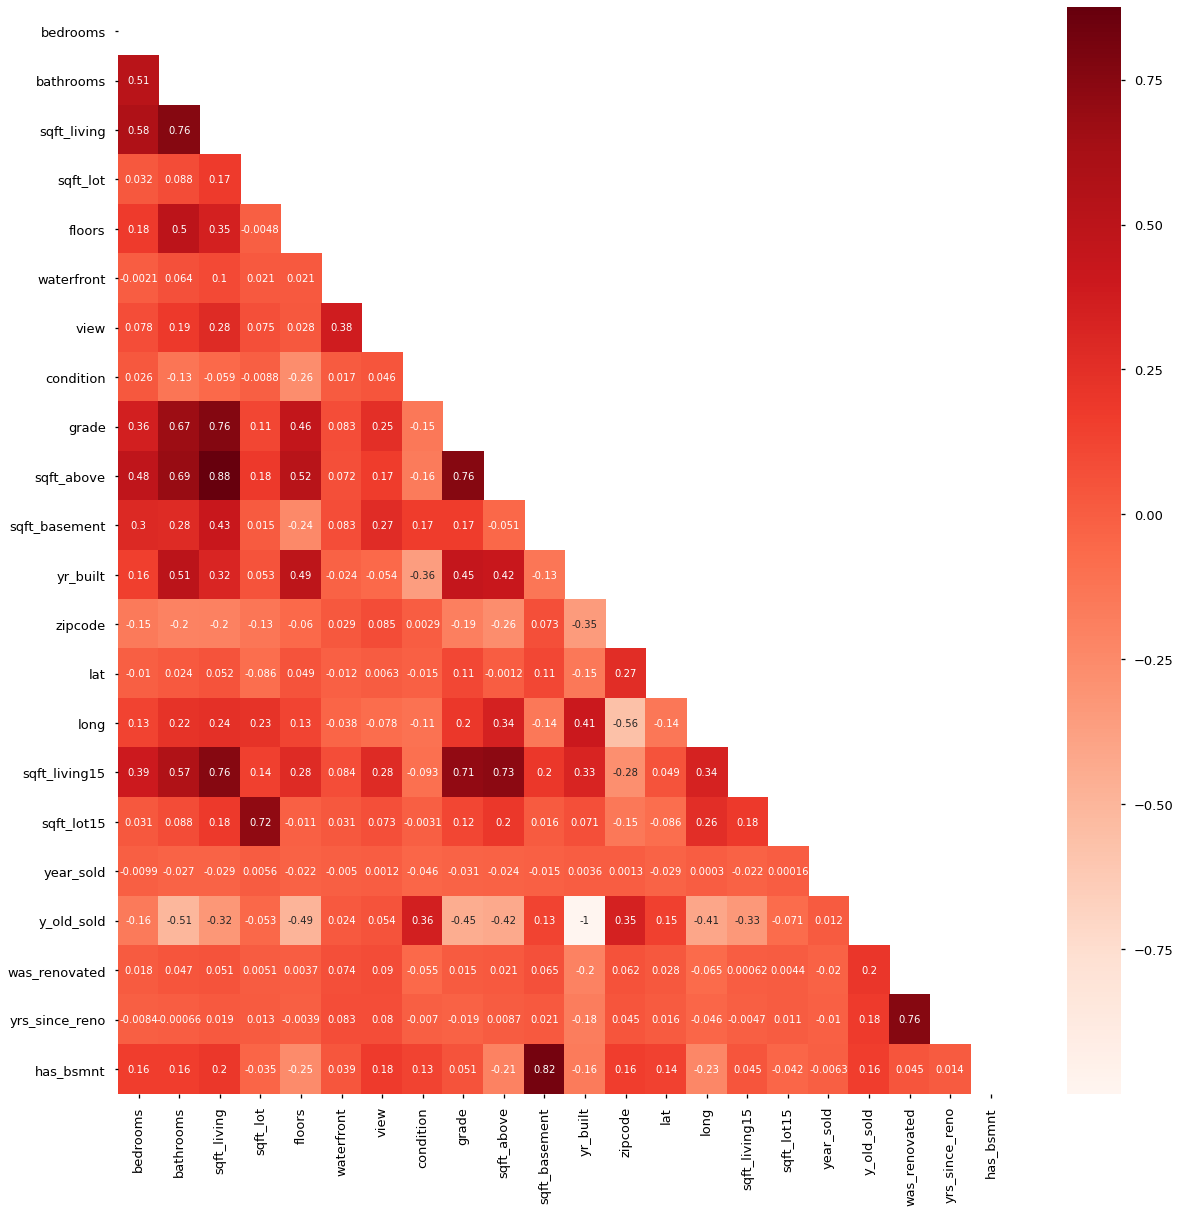

In [45]:
corr_val(df.drop(['price','yr_renovated'],axis=1), figsize=(20,20));

In [46]:
## Correlation results ignoring duplicate values 
## Except for "was_renovated", which shows a perfect relationship to itself

df_corr_results = np.abs(df.drop(['price','yr_renovated'],axis=1).corr().unstack().sort_values(ascending=False).drop_duplicates())

## Show strongest correlations
df_corr_results[1:11]

sqft_above      sqft_living      0.876448
has_bsmnt       sqft_basement    0.820893
sqft_living     grade            0.762779
                sqft_living15    0.756402
yrs_since_reno  was_renovated    0.756165
sqft_above      grade            0.756073
sqft_living     bathrooms        0.755758
sqft_above      sqft_living15    0.731767
sqft_lot15      sqft_lot         0.718204
grade           sqft_living15    0.713867
dtype: float64

**Results:** From the correlation matrix, I see that we have seven pairs of features that show a correlation over .75.

I will drop 'sqft_living', 'was_renovated', and 'has_basement' due to their high correlations.

In [68]:
# Dropping columns to address multicollinearity (over .75)
df_dropped = df.drop(['was_renovated', 'sqft_living','has_bsmnt'], axis=1, inplace=True)
display(df_dropped)

KeyError: "['has_bsmnt'] not found in axis"

In [57]:
# Rerunning model
corr_val(df_dropped.drop('price',axis=1), figsize=(20,20));

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
# Correlation results ignoring (most) duplicate values
df_corr_results = df.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Show strongest postive and negative correlations
display(df_corr_results[1:11], df_corr_results[-11:-1])

### Interpretation of Correlations

***
**Top 10 Positive Relationships**
>* Nothing too surprising as most of the matches are intuitively related.
>  * E.g. "yr_renovated" and "was_renovated" have a nearly-perfect positive correlation as "was_renovated" is determined by "yr_renovated" in our feature engineering.
>
>
>* Two interesting relationships would be:
>  * The living space (ft^2) and grade
>    * Indicates that a larger house has a higher grade
> * The living space (ft^2) of the 15 nearest houses sold
>   * Indicates a larger area above ground (ft^2)
>    * Perhaps larger houses are more likely to be nearby each other?
***
**Top 10 Negative Relationships**
>* Older houses may have fewer bathrooms
>* Older houses may have fewer floors
>* Older houses have a lower grade
***

# **Statistical Testing**

## One-Way ANOVA

I would assume that the condition of a house would have an impact on the price of a house (who would pay more for a run-down house that would need a lot of repair work?).

I wanted to confirm that the different condition levels would be significant for modeling.

### *Testing `'condition'`*

* H0: The feature "condition" does not have an effect on price.

* Ha: The feature "condition" does  have an effect on price.


In [ ]:
## Defining variables for the prices of each value of conditions

condition_1 = df.loc[df['condition'] == 1, 'price']
condition_2 = df.loc[df['condition'] == 2, 'price']
condition_3 = df.loc[df['condition'] == 3, 'price']
condition_4 = df.loc[df['condition'] == 4, 'price']
condition_5 = df.loc[df['condition'] == 5, 'price']

In [ ]:
## Running ANOVA test to determine significance

## Define alpha
alpha = .05

## Run test
result = stats.f_oneway(condition_1, condition_2, condition_3, condition_4, condition_5)
f_stat, p_value = result

# Evaluate signficance
if p_value < .05:
    print(f'The condition of a home is statistically significant with a p-value of {p_value}.')
    
else:
     print(f'The condition of a home is not statistically significant with a p-value of {p_value}.')

In [ ]:
# Show visual of conclusion

sns.barplot(data=df, x= 'condition', y = 'price', ci=68)
plt.suptitle("Conditon's Affect on Price", size = (20))
plt.xlabel('Condition')
plt.ylabel('Price ($)');

#### Interpretation

> The t-test shows that the condition of a house is statistically significant due to the p-value below our alpha of .05.
>
> This means that the quality of a house will have a statistically significant impact on the sell price.

## Two-Sample T-Tests

Again, common sense tells us that waterfront homes would sell for higher prices, but I wanted to confirm that assumption.

### *Testing  `'waterfront'`*

---
**Hypotheses**

>* **H0:** The feature "waterfront" does not have an effect on price.
>
>* **HA:** The feature "waterfront" does  have an effect on price.
>
>* **Alpha** = .05
---

In [ ]:
# Set variables to represent whether or not a property is listed as 'waterfront.'

wf_yes = df.loc[df['waterfront'] == 1, 'price']
wf_no = df.loc[df['waterfront'] == 0, 'price']

In [ ]:
ttest_review(wf_yes, wf_no)

In [ ]:
# Show visual of conclusion

sns.barplot(data=df, x= 'waterfront', y = 'price', ci=68);

#### Interpretation

> The t-test shows that waterfront is statistically significant due to the p-value below our alpha of .05.
>
> This means that having a house on the waterfront will have a significant impact on the sell price.

### *Testing `"was_renovated"`*

**Hypotheses**

---
>* **H0:** There is not a statistically significant difference in price in homes with a basement than those without.
>
>* **HA:** There is a statistically significant difference in price in homes with a basement than those without.
>
>* **Alpha** = 0.05
---

In [ ]:
reno_y = df.loc[df['was_renovated'] == 1, 'price']
reno_n = df.loc[df['was_renovated'] == 0, 'price']


In [ ]:
ttest_review(reno_y, reno_n)

In [ ]:
# Show visual of conclusion

sns.barplot(data=df, x= 'was_renovated', y = 'price', ci=68);

#### Interpretation

> The t-test shows that having a basement is statistically significant due to the p-value below our alpha of .05.
>
> This means that having a house with a basement will have a significant impact on the sell price.

# **Inferential Modeling**

## Baseline Model with Raw Data

Creating a baseline model using the raw dataset.

In [ ]:
## Reviewing feature names and their datatypes
df.info()

In [ ]:
## Establishing the features for inferential modeling

categorical_features = ['was_renovated','has_bsmnt', 'waterfront']

continuous_features = ['yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

model_baseline = create_model(df,continuous_features,categorical_features);

---
**Interpretation:**

>* R^2: ~.6, less than target of .75
>
>* Residual plots show heteroscedasticity
>
>* Q-Q Plot shows non-normal residuals
>
>* Changes: remove outliers and retest
---

## Model without Outliers in 'Price'

What would the model look like if we ignored the outliers?

### Removing Outliers from 'Price' Data

In [ ]:
## Remove outliers from price 
idx_outs = find_outliers_z(df['price'])
df_clean = df[~idx_outs].copy()
df_clean

In [ ]:
## Remove outliers from bedrooms
idx_outs = find_outliers_z(df_clean['bedrooms'])
df_clean = df_clean[~idx_outs].copy()

df_clean

In [ ]:
df_clean.describe()

In [ ]:
## Redefining updated features and re-running model

categorical_features = ['was_renovated','has_bsmnt', 'waterfront']

continuous_features = ['yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

model_clean = create_model(df_clean,cont=continuous_features,cat=categorical_features);

Interpretation:

* R^2: ~.59, less than target of .75 (performed slightly worse)

* Residual plots show somewhat increased homoscedasticity

* Q-Q Plot shows more normal residuals (vs. earlier plot)

* Changes: add zipcode 

## Model (Clean) - w/ Zip Codes

In [ ]:
## Adding zip codes as a categorical variable

categorical_features = ['was_renovated','has_bsmnt', 'waterfront', 'zipcode']

continuous_features = ['yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade', 'floors']

model_w_zip = create_model(df_clean,continuous_features, categorical_features)

Interpretation:

>* Model is significant with an R-squared value over the threshold of .75 (result: .77)
>
>* Residual plots show somewhat homoscedasticity
>
>* Q-Q Plot shows more normal residuals (vs. earlier plot)
>
>* Changes: remove features with p-values higher than .05 (statistically insignificant values)

In [ ]:
## Re-running model after removing 'has_bsmnt' and 'floors'" due to high p-value
categorical_features = ['was_renovated','waterfront', 'zipcode']

continuous_features = ['yrs_since_reno', 'bedrooms', 'bathrooms',
                       'condition','grade']

model_clean = create_model(data=df_clean, cont=continuous_features, cat=categorical_features)

In [ ]:
type(model)

# Recommendations based on Inferential Modeling

If a homeowner is interested in renovating their house, I would recommend the following improvements based on the high coefficients from my model.

* Add bathrooms
* Also consider adding bedrooms
* Use high-quality materials in renovations

While it is outside of the homeowner's ability to change, the zip code for a house's location also has a large impact on the price. A prospective buyer should keep the zip code of the area in mind to help determine the prices of the homes there.

In [ ]:
## Visualizing the impact of number of bathrooms on price
sns.regplot(data=df_clean, x="bathrooms", y='price')
plt.suptitle('Impact of Number of Bathrooms on Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price ($)');

In [ ]:
## Visualizing impact of number of bedrooms on price
sns.regplot(data=df_clean, x="bedrooms", y='price')
plt.suptitle('Impact of Number of Bedrooms on Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)');

In [ ]:
## Visualizing impact of the grade of construction materials on price
sns.regplot(data=df_clean, x="grade", y='price')
plt.suptitle('Impact of Grade of Materials on Price')
plt.xlabel('Grade of Materials')
plt.ylabel('Price ($)');

In [ ]:
## Representing the diversity of prices based on zip codes

fg = sns.catplot(data=df_clean, x="zipcode", y='price', aspect=2.75, height=5)
fg.ax.set_xticklabels(fg.ax.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Impact of Zip Code on Price')
plt.xlabel('Zip Code')
plt.ylabel('Price ($)');

# **Model Testing for Predictions**

Now that I have a working model, I want to go ahead and test it to see how well it works. I will split the data in a 75/25 split into two groups; train a model on the 75%; and then compare it against the remaining 25%. 

**My goal is to have a Root Mean Squared Error (RMSE) less than 200,000.**

## ID Features, Target

First, I want to establish the features I want to use in my testing and my target variable (in this case, price).

In [ ]:
## Save the features that we used previously - I will use these features 
## to fit my model.

X = df_clean[['was_renovated','waterfront', 'zipcode',
            'yrs_since_reno', 'bedrooms', 'bathrooms', 'condition','grade']].copy()

In [ ]:
## Creating the y values by setting them equal to the 'price' values from the dataframe

y = df_clean['price'].copy()

In [ ]:
## Verifying the two groups are of equal length

print(X.shape[0] == y.shape[0])

## Create Train/Test Split

Now I will split the data into the train/test groups. Then, I will run the first linear regression on the "train" data, then another regression on the "test" data.

In [ ]:
## Establishing the train and test data before doing anything else

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=5)

In [ ]:
## Using OneHotEncoder to create columns for the categorical variables.

## Create list of categorical variables
cat_feats = ['condition','grade', 'zipcode']

## Create the OHE without "drop='first" as it would throw an error in this case
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

## Using OHE on our categorical variables for training (NOT testing)
train_ohe = ohe.fit_transform(X_train[cat_feats])
test_ohe = ohe.transform(X_test[cat_feats])

In [ ]:
## Getting feature names from our list of categories
feat_col_name = ohe.get_feature_names(cat_feats)

In [ ]:
## Creating dataframes from the results of our fit&transform and transform

train_ohe_df = pd.DataFrame(train_ohe, columns=feat_col_name, index=X_train.index)

test_ohe_df = pd.DataFrame(test_ohe, columns=feat_col_name, index=X_test.index)

In [ ]:
## Reviewing one of the resulting dataframes
test_ohe_df

In [ ]:
## Reviewing the training dataset
X_train

In [ ]:
## Concatenating the two training dataframes after OHE
X_train_ohe = pd.concat([X_train.drop(cat_feats, axis=1), train_ohe_df], axis=1)

In [ ]:
## Concatenating the two test dataframes after OHE
X_test_ohe = pd.concat([X_test.drop(cat_feats, axis=1), test_ohe_df], axis=1)
X_test_ohe

## Fitting the Model

Now I will create the linear regression model.

In [ ]:
## Instantiating the model and fitting it
lr = LinearRegression()

lr.fit(X_train_ohe, y_train)

In [ ]:
## Checking the R^2 for train and test

train_r = lr.score(X_train_ohe, y_train)
print(f'R-Square value for training data is {round(train_r,3)}.')

test_r = lr.score(X_test_ohe, y_test)
print(f'R-Square value for test data is {round(test_r,3)}.')

## Getting model coefficients
train_coef = pd.Series(lr.coef_, index=X_train_ohe.columns)
train_coef['intercept'] = lr.intercept_

## Displaying resulting features and coefficients
train_coef.sort_values(ascending=False)#.plot(kind='barh');

In [ ]:
## Determining predictions for training data

y_train_pred = lr.predict(X_train_ohe)

## Determining predictions for test data

y_test_pred = lr.predict(X_test_ohe)

## Evaluate Performance

Let's see how it performed against the test dataset!

In [ ]:
## Calculating scores for training model

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Evaluating performance of training data.')
print()
print(f'Mean Absolute Error: {train_mae:,.2f}')
print(f'Mean Squared Error:  {train_mse:,.2f}')
print()
print(f'Root Mean Squared Error: {train_rmse:,.2f}')
train_r = lr.score(X_train_ohe, y_train)
print(f'R-Square value for training data is {round(train_r,2)}.')

In [ ]:
## Calculating scores for test model

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print(f'Mean Absolute Error: {test_mae:,.2f}')
print(f'Mean Squared Error: {test_mse:,.2f}')
print()
print(f'Root Mean Squared Error: {test_rmse:,.2f}')
test_r = lr.score(X_test_ohe, y_test)
print(f'R-Square value for test data is {round(test_r,2)}.')

## Comparing Results

In [ ]:
## Calculating difference between RMSE(Training) and RMSE(Test)

print('Our RMSE values for each set:')
print(f'Train RMSE: {train_rmse:,.2f}')
print(f'Test RMSE: {test_rmse:,.2f}')

diff = train_rmse - test_rmse

print()
print(f'The difference in RMSE between our training and test sets is {diff:,.2f}.')

## Testing Assumptions

In [ ]:
## Determining residuals
residuals = (y_test - y_test_pred)
residuals

In [ ]:
## Plotting to test for normality
sns.histplot(data=residuals);

In [ ]:
## Checking the homoscedasticity of the new model
sns.residplot(x=y_test, y=residuals, lowess=True, color="g");

### Interpretation of Model Results

The model does a great job of explaining the variance between our selected features, with an r-squared value of .79/1.

The RMSE for both the training and test sets are below our target of 200,000! Additionally, the difference between the two is within an acceptable range.

The assumption tests confirm the assumptions that our residuals would be normally distributed and homoscedastic.

## Recursive Feature Elimination

I have a good model created above, but I'd like to see if changing the features would have an impact for me.

**I will use the Recursive Feature Elimination method with Cross Validation to determine another selection of features.**

In [ ]:
## Creating the settings for the selector
selector = RFECV(estimator=lr, step=2, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [ ]:
## Running it on our training data
selector.fit(X_train_ohe, y_train)

In [ ]:
## Dividing the data into two separate variables for inspection
selected_columns = X_train_ohe.columns[selector.get_support()]
removed_columns = X_train_ohe.columns[~selector.get_support()]

In [ ]:
## Inspecting the columns with the greatest impact according to the RSECV method
list(selected_columns.values)

In [ ]:
## Testing the new list of columns

## Instantiating a new regression model
lr_rfe = LinearRegression()

## Fitting the model to the new data
lr_rfe.fit(X_train_ohe[selected_columns], y_train)

# Using the model to create new predictions
y_rfe = lr_rfe.predict(X_train_ohe[selected_columns])

# Determining RMSE for new list of columns and TRAIN data
trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))

print(f'Training Root Mean Squared Error: {trainRFE_rmse:,.2f}')

# Determining RMSE for new list of columns and TEST data
y_pred_rfe = lr_rfe.predict(X_test_ohe[selected_columns])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print(f'Testing Root Mean Squared Error: {testRFE_rmse:,.2f}')

diff2 = trainRFE_rmse - testRFE_rmse
print()
print(f'The difference in RMSE between our training and test sets is {diff2:,.2f}.')

In [ ]:
test_rsq = lr_rfe.score(X_test_ohe[selected_columns], y_test)
print(f'R-Square value for testing data after RFECV is {round(test_rsq,2)}.')

### Interpretation of Results of RFEVC

---
**Comparing RMSEs from original model to RFECV:**

* **Pre-RFECV model results:**
   * The R^2 value for both training and testing data was .79 (significant as it is over the .70 threshold).
   * *Our RMSE values for each set:*
        * Train RMSE: 117,679.79
        * Test RMSE: 122,263.56
    * The difference in RMSE between our training and test sets is **-4,583.77**.


 * **Post-RFECV model results:**
     * The R^2 value for the test data is .48 (.31 lower than other model, and far below threshold).
     * *Our RMSE values for each set:*
         * Training Root Mean Squared Error: 182,158.41
         * Testing Root Mean Squared Error: 191,360.88
     * The difference in RMSE between our training and test sets is **-9,202.47**.

---

**Final Analysis of RFE method:** The RFE results produced a large decrease in model perfomance as determined by the lower R^2 and lower RMSE values. I will continue using the first model for future predictions.

---

# **Model Testing - Original Data** 

The model produced above was based on data from which we removed any outliers. I am re-running the tests to determine if there is any difference in the results. 

**My goal is to have a Root Mean Squared Error (RMSE) less than 200,000.**

In [ ]:
## Load, recast dtypes

df= pd.read_csv(local_data,parse_dates = ['date'], index_col=0)
df.info()

In [ ]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [ ]:
df.info()

## ID Features, Target

In [ ]:
cols = ['was_renovated','waterfront', 'zipcode',
            'yrs_since_reno', 'bedrooms', 'bathrooms', 'condition','grade']

[col for col in df.columns if col not in cols]

In [ ]:
drop_cols = ['date', 'lat','long', 'price']

In [ ]:
## Saving the features that I used for inferential modeling - I will use these features 
## to fit my model.

X = df.drop(columns = drop_cols).copy()

In [ ]:
X.head()

In [ ]:
## Creating the y values by setting them equal to the 'price' values from the dataframe

y = df['price'].copy()

In [ ]:
## Verifying the two groups are of equal length

print(X.shape[0] == y.shape[0])

## Create Train/Test Split

Now I will split the data into the train/test groups. Then, I will run the first linear regression on the "train" data, then another regression on the "test" data.

In [ ]:
## Establishing the train and test data before doing anything else

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=5)

In [ ]:
X_train.isna().sum()

# **Creating the Pipeline** <a name='pipeline'></a> [🔝](#top)

In [ ]:
## Instantiate an imputer to add zeroes

imp_zero = SimpleImputer(strategy='constant', fill_value=0)

In [ ]:
## Instantiate an imputer to fill values with the mode value

imp_mode = SimpleImputer(strategy='most_frequent')

In [ ]:
## Instantiate a OneHotEncoder for categorical variables

ohe = OneHotEncoder(drop='first', sparse=False)

In [ ]:
## Setting up the individual transformers and then the ColumnTransformer

## Adding zeroes for missing values in sqft_basement
imp_zero_cols = ['sqft_basement']
zero_transformer = Pipeline(steps=[
    ('imp_zero',SimpleImputer(strategy='constant', fill_value=0))])


## Adding the mode value to view, waterfront, and yr_renovated missing values 
imp_mode_cols = ['view','waterfront','yr_renovated']
mode_transformer = Pipeline(steps=[
    ('imp_mode',SimpleImputer(strategy='most_frequent'))])


# ## Removed this code due to errors encountered b/t train, test categoricals
# ohe_cols = ['condition','grade', 'zipcode']
# categorical_transformer = OneHotEncoder(drop='first', sparse=False)


## Encoding categoricals - handling errors to prevent issues w/ test set
ohe_cols = ['condition','grade', 'zipcode']
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)


## Instantiating the ColumnTransformer to handle the missing values for ea.col.
preprocessor = ColumnTransformer(
    transformers=[
        ('zero', zero_transformer, imp_zero_cols),
        ('mode', mode_transformer, imp_mode_cols),
        ('cats', categorical_transformer, ohe_cols)])

preprocessor

In [ ]:
## Fit and transform the data via the ColumnTransformer
X_train_tf = preprocessor.fit_transform(X_train)

In [ ]:
## Getting feature names from OHE
ohe_cat_names = preprocessor.named_transformers_['cats'].get_feature_names(ohe_cols)
ohe_cat_names

In [ ]:
## Generating list for column index
final_cols = [*imp_zero_cols, *imp_mode_cols, *ohe_cat_names]

In [ ]:
## Instantiating a DF storing the resulting transformed training data
X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)
X_train_tf_df

In [ ]:
## Transforming the test set
X_test_tf = preprocessor.transform(X_test)
X_test_tf

In [ ]:
## Creating DF for test data
X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)
X_test_tf_df

In [ ]:
sm_reg = sms.OLS(y_train, X_train_tf_df).fit()
sm_reg.summary()

In [ ]:
sm_reg.params

In [ ]:
## Creating full pipeline with ColumnTransformer and LinearRegression
reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression(fit_intercept=True))])

In [ ]:
## Fittng pipeline to the training data
reg_pipe.fit(X_train, y_train)

In [ ]:
## Running the pipeline on the training data
y_hat_train = reg_pipe.predict(X_train)
y_hat_train

In [ ]:
## Running the pipeline on the testing data
y_hat_test = reg_pipe.predict(X_test)
y_hat_test

In [ ]:
reg_pipe['regressor'].intercept_

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [ ]:
pipe_coefs = pd.Series(reg_pipe['regressor'].coef_, index=final_cols)
pipe_coefs['intercept'] = reg_pipe['regressor'].intercept_
pipe_coefs.head(20)

In [ ]:
def eval_perf(reg_pipe, X_train, y_train):
    
    ## Evaluating performance of training model
    y_hat_train = reg_pipe.predict(X_train)
    
    train_mae = metrics.mean_absolute_error(y_train, y_hat_train)
    train_mse = metrics.mean_squared_error(y_train, y_hat_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))
    train_r = metrics.r2_score(y_train, y_hat_train)

    print('Evaluating Performance:\n')
    print(f'Mean Absolute Error: {train_mae:,.2f}')
    print(f'Mean Squared Error:  {train_mse:,.2f}\n')
    print(f'Root Mean Squared Error: {train_rmse:,.2f}')
    print(f'R-Square Value: {round(train_r,2)}')

In [ ]:
eval_perf(reg_pipe, X_train, y_train)

In [ ]:
eval_perf(reg_pipe, X_test, y_test)

In [ ]:
## Evaluating performance of training model

train_mae = metrics.mean_absolute_error(y_train, y_hat_train)
train_mse = metrics.mean_squared_error(y_train, y_hat_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))
train_r = metrics.r2_score(y_train, y_hat_train)

print('Evaluating performance of training data:\n')
print(f'Mean Absolute Error: {train_mae:,.2f}')
print(f'Mean Squared Error:  {train_mse:,.2f}\n')
print(f'Root Mean Squared Error: {train_rmse:,.2f}')
print(f'R-Square value for training data: {round(train_r,2)}')

In [ ]:
## Evaluating performance of testing model

test_mae = metrics.mean_absolute_error(y_test, y_hat_test)
test_mse = metrics.mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
test_r = metrics.r2_score(y_test, y_hat_test)

print('Evaluating performance of testing data:\n')
print(f'Mean Absolute Error: {test_mae:,.2f}')
print(f'Mean Squared Error:  {test_mse:,.2f}\n')
print(f'Root Mean Squared Error: {test_rmse:,.2f}')
print(f'R-Square value for testing data: {round(test_r,2)}')

In [ ]:
# Creating first GridSearchCV to determine best parameters for LinReg

param_grid = {'fit_intercept': [True, False]}
reg = GridSearchCV(LinearRegression(), param_grid, verbose=True,
                   scoring='r2')
reg.fit(X_train_tf_df, y_train)
display(reg.best_params_)
display(reg.best_score_)
display(reg.best_estimator_)
display(reg.get_params())

In [ ]:
## Results in a DF format
# pd.DataFrame(reg.cv_results_).T

In [ ]:
## Performing GSCV on test data
y_hat_test = reg.predict(X_test_tf_df)
y_hat_test

In [ ]:
## Evaluating model peformance

test_mae = metrics.mean_absolute_error(y_test, y_hat_test)
test_mse = metrics.mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
test_r = metrics.r2_score(y_test, y_hat_test)

print('Evaluating performance of testing data.')
print()
print(f'Mean Absolute Error: {test_mae:,.2f}')
print(f'Mean Squared Error:  {test_mse:,.2f}')
print()
print(f'Root Mean Squared Error: {test_rmse:,.2f}')
print(f'R-Square value for testing data is {round(test_r,2)}.')

In [ ]:
reg_pipe

In [ ]:
## Running gridsearch on pipeline

param_grid = {'preprocessor__mode__imp_mode__strategy': ['mean','median',
                                                        'most_frequent']}
reg = GridSearchCV(reg_pipe, param_grid, verbose=True,
                   scoring='neg_root_mean_squared_error')
reg.fit(X_train, y_train)
display(reg.best_score_, reg.best_params_)

In [ ]:
eval_perf(reg, X_train, y_train)

In [ ]:
eval_perf(reg, X_test, y_test)

In [ ]:
## Running gridsearch on pipeline

param_grid = {'preprocessor__mode__imp_mode__strategy': ['mean','median',
                                                        'most_frequent']}
reg = GridSearchCV(reg_pipe, param_grid, verbose=True,
                   scoring='r2')
reg.fit(X_train, y_train)
display(reg.best_score_)
display(reg.best_params_)

In [ ]:
eval_perf(reg, X_train, y_train)

In [ ]:
eval_perf(reg, X_test, y_test)

In [ ]:
pd.DataFrame(reg.cv_results_)

In [ ]:
import sklearn
sklearn.__version__

# What now?<a name="what-now"></a> [🔝](#top)

# Old Code

In [ ]:
## Using OneHotEncoder to create columns for the categorical variables.

## Create list of categorical variables
cat_feats = ['condition','grade', 'zipcode']

## Create the OHE without "drop='first" as it would throw an error in this case
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

## Using OHE on our categorical variables for training (NOT testing)
train_ohe = ohe.fit_transform(X_train[cat_feats])
test_ohe = ohe.transform(X_test[cat_feats])

In [ ]:
## Getting feature names from our list of categories
feat_col_name = ohe.get_feature_names(cat_feats)

In [ ]:
## Creating dataframes from the results of our fit&transform and transform

train_ohe_df = pd.DataFrame(train_ohe, columns=feat_col_name, index=X_train.index)

test_ohe_df = pd.DataFrame(test_ohe, columns=feat_col_name, index=X_test.index)

In [ ]:
## Reviewing one of the resulting dataframes
test_ohe_df

In [ ]:
X_train

In [ ]:
## Combining the training dataframes after performing OHE
X_train_ohe = pd.concat([X_train.drop(cat_feats, axis=1), train_ohe_df], axis=1)

In [ ]:
## Combining the testing dataframes after performing OHE
X_test_ohe = pd.concat([X_test.drop(cat_feats, axis=1), test_ohe_df], axis=1)
X_test_ohe

## Fitting the Model

In [ ]:
## Instantiating the model and fitting it
lr = LinearRegression()

lr.fit(X_train_ohe, y_train)

In [ ]:
## Checking the R^2 for train and test

train_r = lr.score(X_train_ohe, y_train)
print(f'R-Square value for training data is {round(train_r,3)}.')

test_r = lr.score(X_test_ohe, y_test)
print(f'R-Square value for test data is {round(test_r,3)}.')

## Getting model coefficients
train_coef = pd.Series(lr.coef_, index=X_train_ohe.columns)
train_coef['intercept'] = lr.intercept_

## Displaying resulting features and coefficients
train_coef.sort_values(ascending=False)[:11]#.plot(kind='barh');

In [ ]:
## Determining predictions for training data

y_train_pred = lr.predict(X_train_ohe)


## Determining predictions for test data

y_test_pred = lr.predict(X_test_ohe)


## Evaluate Performance

In [ ]:
## Calculating scores for training model

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Evaluating performance of training data.')
print()
print(f'Mean Absolute Error: {train_mae:,.2f}')
print(f'Mean Squared Error:  {train_mse:,.2f}')
print()
print(f'Root Mean Squared Error: {train_rmse:,.2f}')
train_r = lr.score(X_train_ohe, y_train)
print(f'R-Square value for training data is {round(train_r,2)}.')

In [ ]:
## Calculating scores for test model

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print(f'Mean Absolute Error: {test_mae:,.2f}')
print(f'Mean Squared Error: {test_mse:,.2f}')
print()
print(f'Root Mean Squared Error: {test_rmse:,.2f}')
test_r = lr.score(X_test_ohe, y_test)
print(f'R-Square value for test data is {round(test_r,2)}.')

## Comparing Results

In [ ]:
## Calculating difference between RMSE(Training) and RMSE(Test)

print('Our RMSE values for each set:')
print(f'Train RMSE: {train_rmse:,.2f}')
print(f'Test RMSE: {test_rmse:,.2f}')

diff = train_rmse - test_rmse

print()
print(f'The difference in RMSE between our training and test sets is {diff:,.2f}.')

## Testing Assumptions

In [ ]:
## Determining residuals
residuals = (y_test - y_test_pred)
residuals

In [ ]:
## Plotting to test for normality
sns.histplot(data=residuals);

In [ ]:
## Checking the homoscedasticity of the new model
sns.residplot(x=y_test, y=residuals, lowess=True, color="g");

### Interpretation of Model Results

The model continues to do a job of explaining the variance between our selected features, with an r-squared value of .79/1.

The RMSE for both the training and test sets are below our target of 200,000, but higher than our model without the outliers. The difference between the two RMSEs did increase, indicating area for improvement.

The assumption tests confirm the assumptions that our residuals would be normally distributed and homoscedastic.

## Recursive Feature Elimination

The model using the original data performed worse in terms of RMSE, but maintained the R^2 value of .79.

Let's see if the RFECV has any impact this time.

In [ ]:
## Creating the settings for the selector
selector = RFECV(estimator=lr, step=2, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [ ]:
## Running it on our training data
selector.fit(X_train_ohe, y_train)

In [ ]:
## Dividing the data into two separate variables for inspection
selected_columns = X_train_ohe.columns[selector.get_support()]
removed_columns = X_train_ohe.columns[~selector.get_support()]

In [ ]:
## Inspecting the columns with the greatest impact according to the RSECV method
list(selected_columns.values)

In [ ]:
## Testing the new list of columns

## Instantiating a new regression model
lr_rfe = LinearRegression()

## Fitting the model to the new data
lr_rfe.fit(X_train_ohe[selected_columns], y_train)

# Using the model to create new predictions
y_rfe = lr_rfe.predict(X_train_ohe[selected_columns])

# Determining RMSE for new list of columns and TRAIN data
trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))

print(f'Training Root Mean Squared Error: {trainRFE_rmse:,.2f}')

# Determining RMSE for new list of columns and TEST data
y_pred_rfe = lr_rfe.predict(X_test_ohe[selected_columns])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print(f'Testing Root Mean Squared Error: {testRFE_rmse:,.2f}')

diff2 = trainRFE_rmse - testRFE_rmse
print()
print(f'The difference in RMSE between our training and test sets is {diff2:,.2f}.')

In [ ]:
test_rsq = lr_rfe.score(X_test_ohe[selected_columns], y_test)
print(f'R-Square value for testing data after RFECV is {round(test_rsq,2)}.')

---
**Comparing RMSEs from original to RFECV:**

* **Pre-RFECV model results:**
   * The R^2 value for both training and testing data was .79 (significant as it is over the .70 threshold).
   * *Our RMSE values for each set:*
        * Train RMSE: 117,679.79
        * Test RMSE: 122,263.56
    * The difference in RMSE between our training and test sets is **-4,583.77**.


 * **Post-RFECV model results:**
     * The R^2 value for the test data is .48 (.31 lower than other model, and far below threshold).
     * *Our RMSE values for each set:*
         * Training Root Mean Squared Error: 182,158.41
         * Testing Root Mean Squared Error: 191,360.88
     * The difference in RMSE between our training and test sets is **-9,202.47**.

---

**Final Analysis of RFE method:** The RFE results produced a large decrease in model perfomance as determined by the lower R^2 and lower RMSE values. I will continue with the first model for future predictions.

---

# **Pickling the Model for Reuse**

In [ ]:
# ## Setting coefficients and target
# X = df[['was_renovated','waterfront', 'zipcode',
#             'yrs_since_reno', 'bedrooms', 'bathrooms', 'condition','grade']].copy()
# y = df['price'].copy()

In [ ]:
# ## Create list of categorical variables
# cat_feats = ['condition','grade', 'zipcode']

# ## Create the OHE without "drop='first" as it would throw an error in this case
# ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

# ## Using OHE on our categorical variables for training (NOT testing)
# final_ohe = ohe.fit_transform(X[cat_feats])

In [ ]:
# ## Getting feature names from our list of categories
# feat_col_name = ohe.get_feature_names(cat_feats)

In [ ]:
# ## Creating DF of final results
# penultimate_ohe_df = pd.DataFrame(final_ohe, columns=feat_col_name, index=X.index)

In [ ]:
# ## Updating final DF
# final_ohe_df = pd.concat([X.drop(cat_feats, axis=1), penultimate_ohe_df], axis=1)

In [ ]:
# ## Instantiating and fitting the regression
# lr_final = LinearRegression()

# lr_final = lr_final.fit(final_ohe_df, y)

In [ ]:
# # Generating predictions
# final_pred = lr_final.predict(final_ohe_df)

In [ ]:
# ## Confirming predictions work
# display(final_pred)

In [ ]:
# # Saving model to .pickle file
# import pickle

# pickle_out = open("final_model.pickle","wb")
# pickle.dump(lr_final, pickle_out)
# pickle_out.close()